<a href="https://colab.research.google.com/github/viratchowdary21/Insurance-cross-sell-prediction/blob/main/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')
import seaborn as sns

# Import the necessary libraries first
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest, RFE
from sklearn.linear_model import LassoCV, LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Processing**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Insurance cross sell.csv")

In [ ]:
df.head(5)

id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1    Male   44  ...                  26.0      217         1
1   2    Male   76  ...                  26.0      183         0
2   3    Male   47  ...                  26.0       27         1
3   4    Male   21  ...                 152.0      203         0
4   5  Female   29  ...                 152.0       39         0

[5 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
for catogery in df.columns:
  print(str(catogery) + " : " + str(df[catogery].unique()))
  print('-'*100)

id : [     1      2      3 ... 381107 381108 381109]
----------------------------------------------------------------------------------------------------
Gender : ['Male' 'Female']
----------------------------------------------------------------------------------------------------
Age : [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
----------------------------------------------------------------------------------------------------
Driving_License : [1 0]
----------------------------------------------------------------------------------------------------
Region_Code : [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
------------------------------------------------------

In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
df.count(axis=0)

id                      381109
Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
Response                381109
dtype: int64

**LabelEncoder** can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Transform labels back to original encoding. Transform labels to normalized encoding.

In [ ]:
le = LabelEncoder()
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
df['Vehicle_Age'] = le.fit_transform(df['Vehicle_Age'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()


id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1       1   44  ...                  26.0      217         1
1   2       1   76  ...                  26.0      183         0
2   3       1   47  ...                  26.0       27         1
3   4       1   21  ...                 152.0      203         0
4   5       0   29  ...                 152.0       39         0

[5 rows x 12 columns]

# Data Visualization 

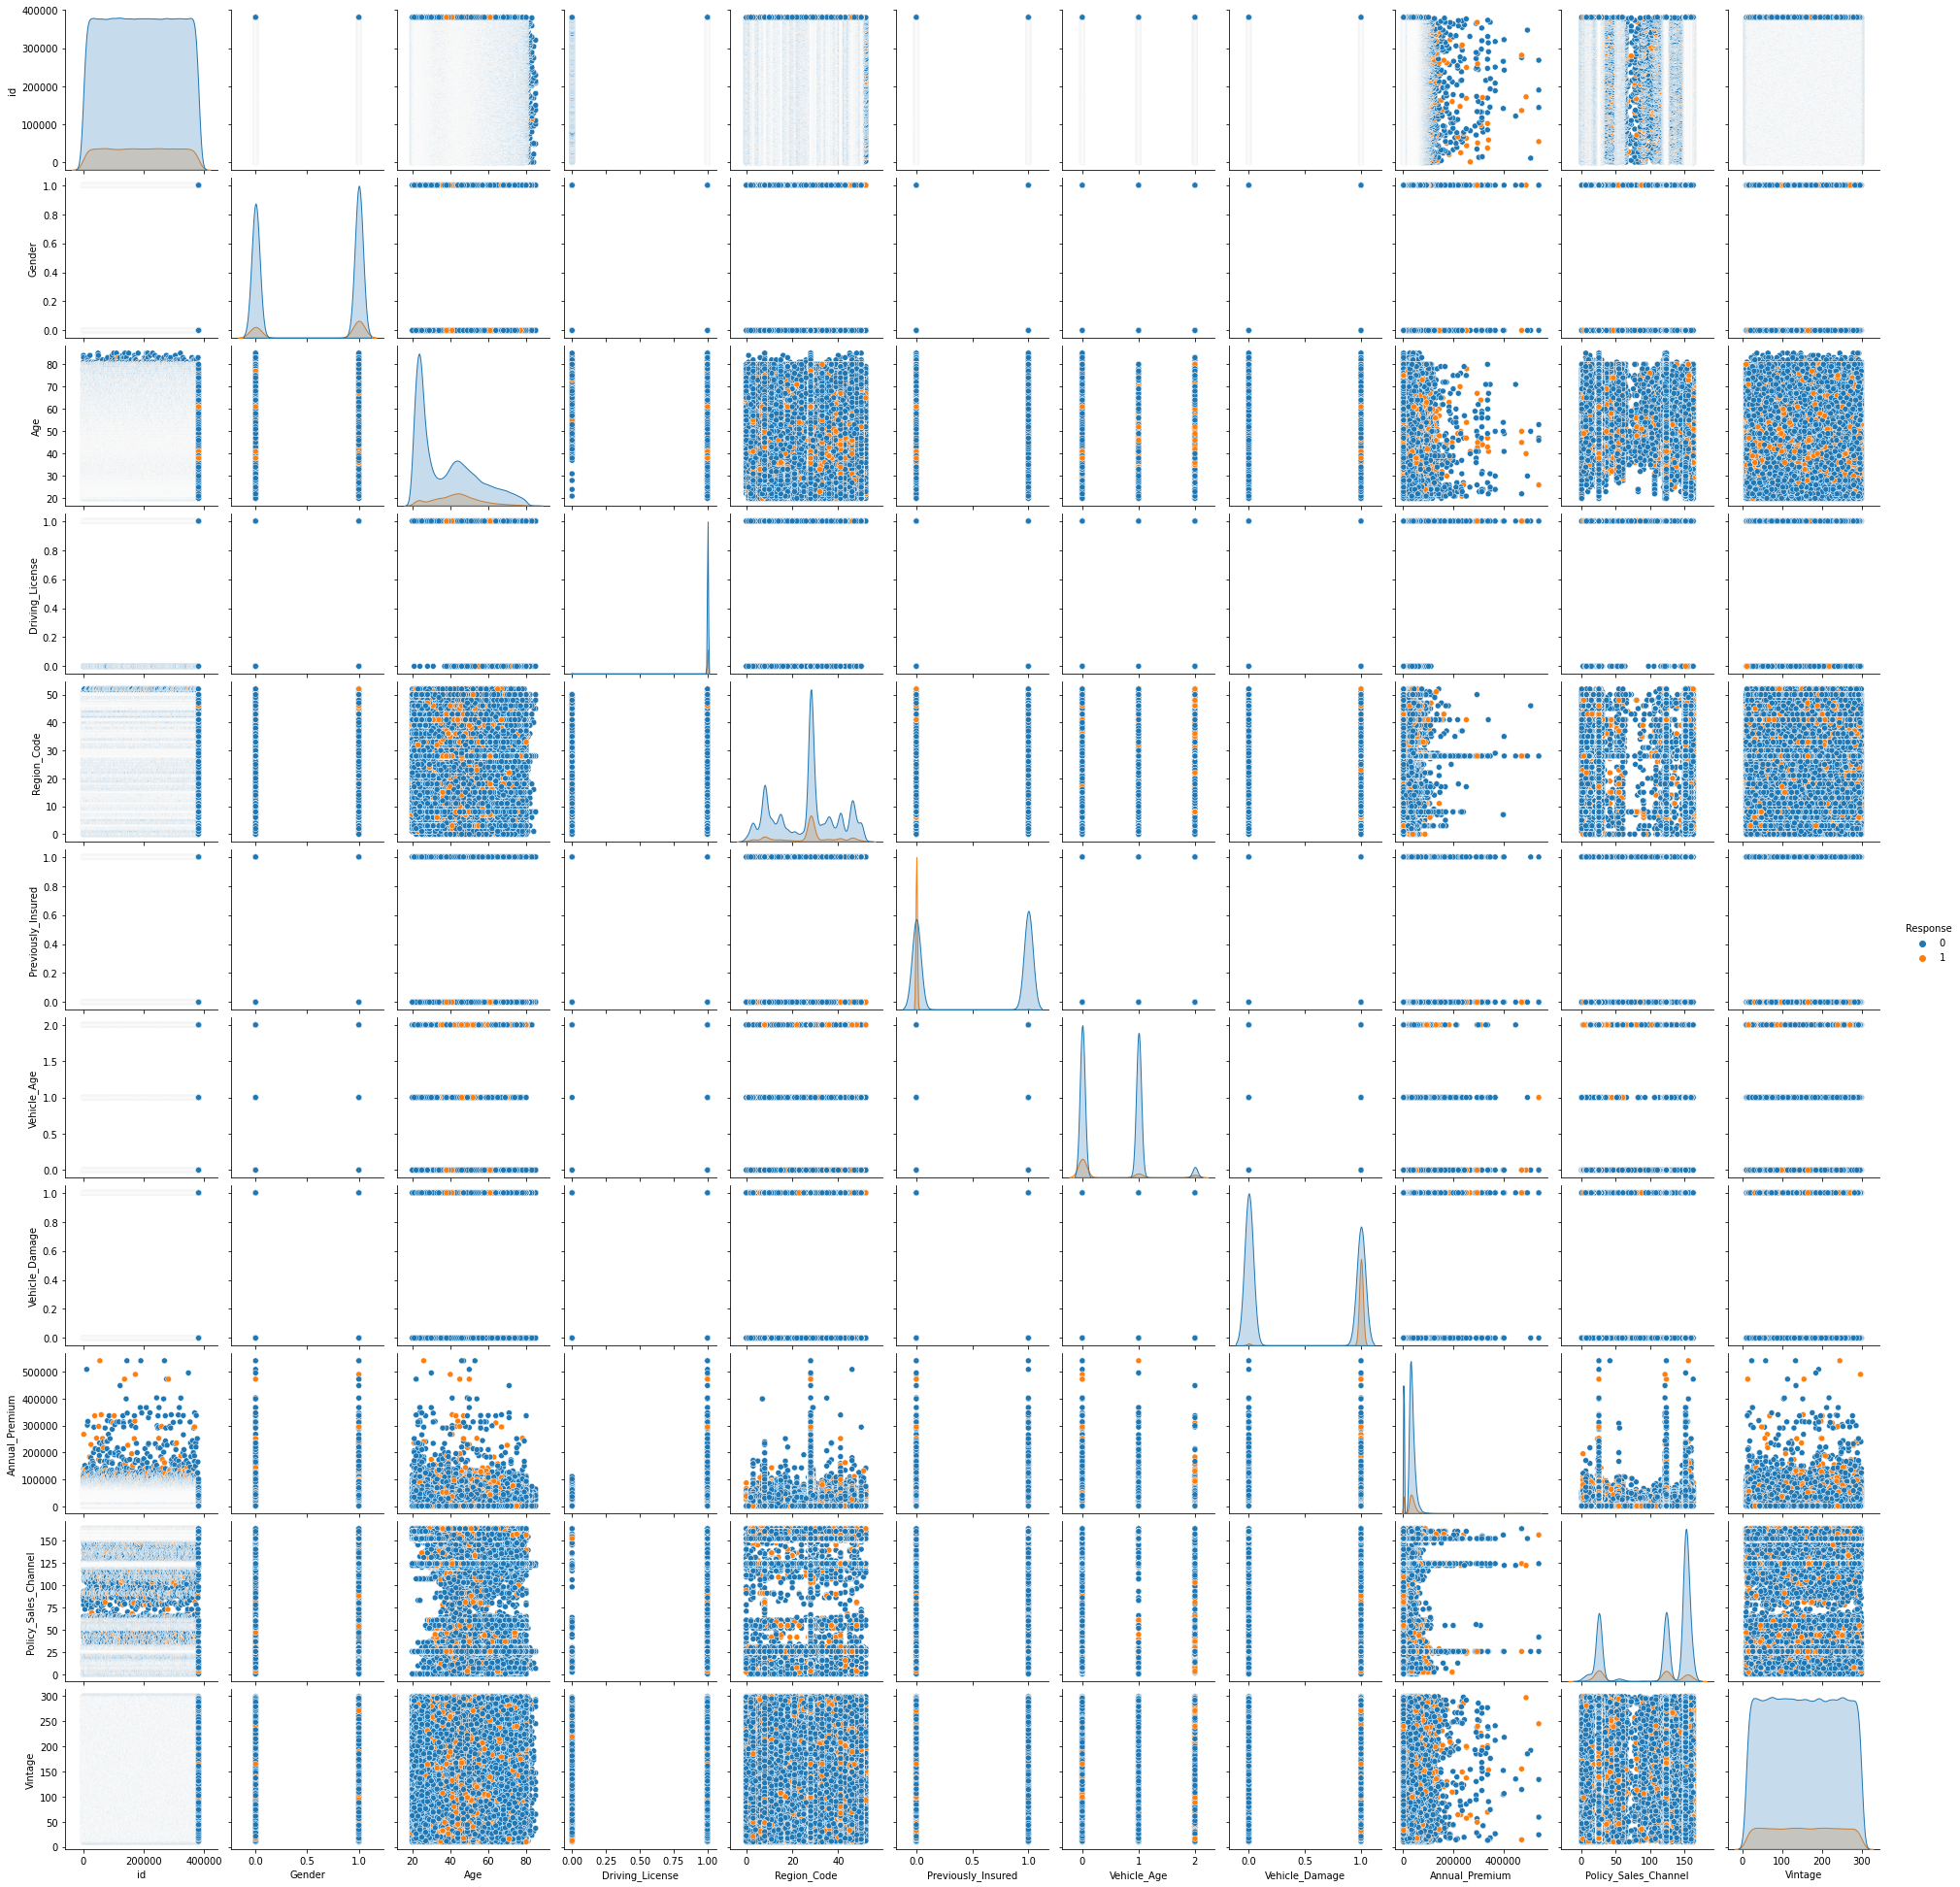

In [ ]:
sns.pairplot(data=df, hue='Response')

In [ ]:
df.corr()


id    Gender  ...   Vintage  Response
id                    1.000000  0.000999  ... -0.000630 -0.001368
Gender                0.000999  1.000000  ... -0.002517  0.052440
Age                   0.001561  0.145545  ... -0.001264  0.111147
Driving_License      -0.000564 -0.018374  ... -0.000848  0.010155
Region_Code          -0.000572  0.000604  ... -0.002750  0.010570
Previously_Insured    0.002457 -0.081932  ...  0.002537 -0.341170
Vehicle_Age          -0.001345 -0.112625  ...  0.002484 -0.104078
Vehicle_Damage       -0.001507  0.091606  ... -0.002064  0.354400
Annual_Premium        0.003027  0.003673  ... -0.000608  0.022575
Policy_Sales_Channel -0.002837 -0.111159  ...  0.000002 -0.139042
Vintage              -0.000630 -0.002517  ...  1.000000 -0.001050
Response             -0.001368  0.052440  ... -0.001050  1.000000

[12 rows x 12 columns]

In [ ]:
sns.set(rc={'figure.figsize':(25,6)})
sns.heatmap(df.corr(),linewidths=5, annot=True,cmap='YlGnBu')



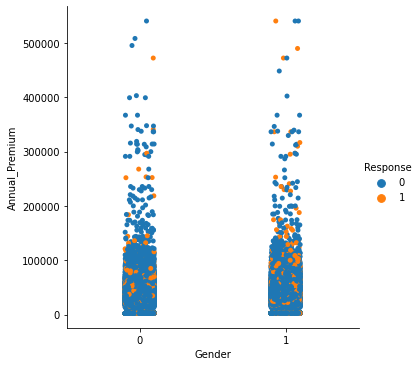

In [ ]:
sns.catplot(x="Gender", y="Annual_Premium",hue="Response", data=df)


In [ ]:
df.head(1)

id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1       1   44  ...                  26.0      217         1

[1 rows x 12 columns]

In [ ]:
ax = sns.boxplot(x="Annual_Premium", y="Response",
                 data=df, palette="Set3")

In [ ]:
len(df[df.Annual_Premium>10000]) 

316227

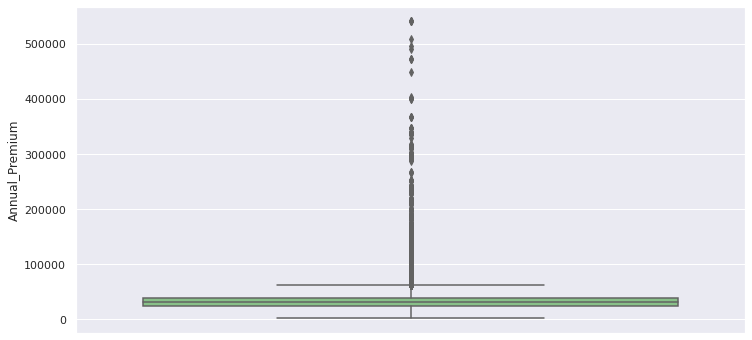

In [ ]:
sns.boxplot(y = 'Annual_Premium', data = df, palette='Accent')


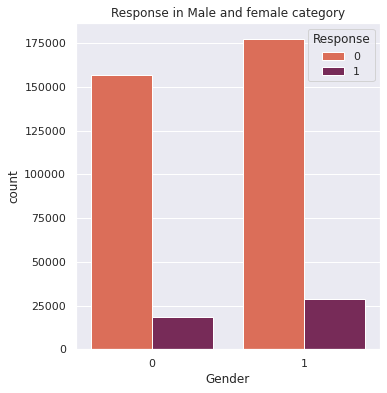

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['Response'],palette="rocket_r")
plt.title("Response in Male and female category")
plt.show()


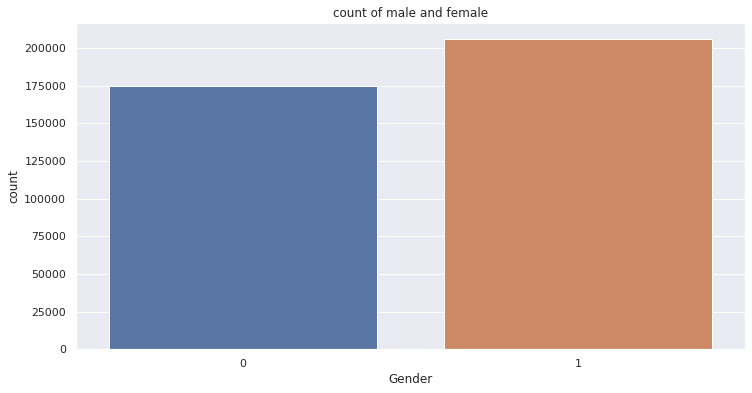

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})

sns.countplot(df['Gender'])
plt.title("count of male and female")

plt.show()



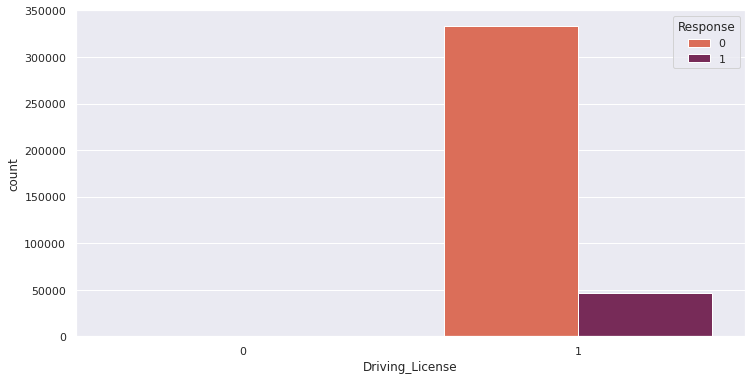

In [ ]:
sns.countplot('Driving_License', hue = 'Response',data = df,palette="rocket_r")


In [ ]:
sns.countplot('Vehicle_Age', hue = 'Response',data = df,palette="cool")


In [ ]:
sns.countplot('Vehicle_Damage', hue = 'Response',data = df,palette="cool")


In [ ]:
sns.distplot(df['Policy_Sales_Channel'])


In [ ]:
df['Region_Code'].value_counts().plot(kind='barh', figsize=(20,10), title="Region_Code distribution in df");


In [ ]:
df.head()

id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1       1   44  ...                  26.0      217         1
1   2       1   76  ...                  26.0      183         0
2   3       1   47  ...                  26.0       27         1
3   4       1   21  ...                 152.0      203         0
4   5       0   29  ...                 152.0       39         0

[5 rows x 12 columns]

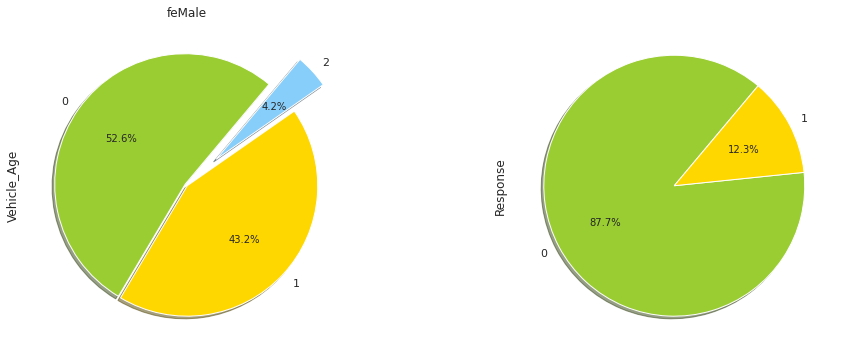

In [ ]:

plt.figure(figsize=(16,6))

ax1 = plt.subplot(121, aspect='equal')
color = ['yellowgreen','gold',"lightskyblue"]
df['Vehicle_Age'].value_counts().plot.pie(y="Vehicle_Age",colors=color,explode=(0.02,0,0.3),startangle=50,shadow=True,autopct="%0.1f%%", ax=ax1)
ax1.title.set_text('Male')

ax2 = plt.subplot(122, aspect='equal')
color = ['yellowgreen','gold',"lightskyblue"]
df['Response'].value_counts().plot.pie(y="Response",colors=color,startangle=50,shadow=True,autopct="%0.1f%%", ax =ax2)
ax1.title.set_text('feMale')
plt.show()

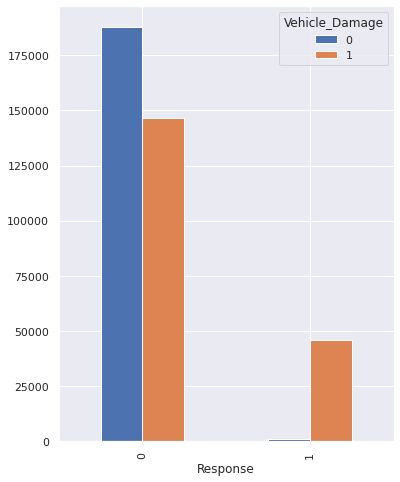

In [ ]:
sns.set(rc={'figure.figsize':(25,6)})

pd.crosstab(df['Response'], df['Vehicle_Damage']).plot(kind='bar');


# feature Scaling

In [ ]:
df.head()

id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1       1   44  ...                  26.0      217         1
1   2       1   76  ...                  26.0      183         0
2   3       1   47  ...                  26.0       27         1
3   4       1   21  ...                 152.0      203         0
4   5       0   29  ...                 152.0       39         0

[5 rows x 12 columns]

In [ ]:
X = df.drop(["id", "Response"], axis=1)
y = df['Response']

In [ ]:
X_n = X.to_numpy()
Y_n = y.to_numpy()

In [ ]:
df.head(1)

id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1       1   44  ...                  26.0      217         1

[1 rows x 12 columns]

pending

In [ ]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=6) # we want to select top 4 features
fit = test.fit(X, y)


# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[4.813e+02 2.918e+04 8.374e-02 2.824e+02 2.403e+04 2.668e+03 2.370e+04
 1.883e+06 1.932e+05 1.907e+01]


In [ ]:
features = fit.transform(X)
# Summarize selected features
print(features[0:5,:]) # Top 5 Rows of Dataset after Chi-squared Test

[[4.400e+01 0.000e+00 2.000e+00 1.000e+00 4.045e+04 2.600e+01]
 [7.600e+01 0.000e+00 0.000e+00 0.000e+00 3.354e+04 2.600e+01]
 [4.700e+01 0.000e+00 2.000e+00 1.000e+00 3.829e+04 2.600e+01]
 [2.100e+01 1.000e+00 1.000e+00 0.000e+00 2.862e+04 1.520e+02]
 [2.900e+01 1.000e+00 1.000e+00 0.000e+00 2.750e+04 1.520e+02]]


In [ ]:
X.to_numpy()[:5, :]  # 145678

array([[1.000e+00, 4.400e+01, 1.000e+00, 2.800e+01, 0.000e+00, 2.000e+00,
        1.000e+00, 4.045e+04, 2.600e+01, 2.170e+02],
       [1.000e+00, 7.600e+01, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.354e+04, 2.600e+01, 1.830e+02],
       [1.000e+00, 4.700e+01, 1.000e+00, 2.800e+01, 0.000e+00, 2.000e+00,
        1.000e+00, 3.829e+04, 2.600e+01, 2.700e+01],
       [1.000e+00, 2.100e+01, 1.000e+00, 1.100e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 2.862e+04, 1.520e+02, 2.030e+02],
       [0.000e+00, 2.900e+01, 1.000e+00, 4.100e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 2.750e+04, 1.520e+02, 3.900e+01]])

In [ ]:
X.head(5)

Gender  Age  Driving_License  ...  Annual_Premium  Policy_Sales_Channel  Vintage
0       1   44                1  ...         40454.0                  26.0      217
1       1   76                1  ...         33536.0                  26.0      183
2       1   47                1  ...         38294.0                  26.0       27
3       1   21                1  ...         28619.0                 152.0      203
4       0   29                1  ...         27496.0                 152.0       39

[5 rows x 10 columns]

In [ ]:
# Feature extraction
model = LogisticRegression(max_iter=2000)
rfe = RFE(estimator=model,n_features_to_select= 6)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Num Features: 6
Selected Features: [ True  True  True False  True  True  True False False False]
Feature Ranking: [1 1 1 3 1 1 1 5 2 4]
Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage'],
      dtype='object')


In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X, y))
coef = pd.Series(reg.coef_, index = X.columns)


Best alpha using built-in LassoCV: 0.127430
Best score using built-in LassoCV: 0.020095


In [ ]:
reg.coef_

array([ 0.000e+00,  3.136e-04,  0.000e+00,  0.000e+00, -0.000e+00,
       -0.000e+00,  0.000e+00,  1.464e-07, -7.407e-04, -0.000e+00])

In [ ]:
print("Lasso picked " + str(sum(coef >= 1)) + " variables and eliminated the other " +  str(sum(coef < 1)) + " variables")

Lasso picked 0 variables and eliminated the other 10 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

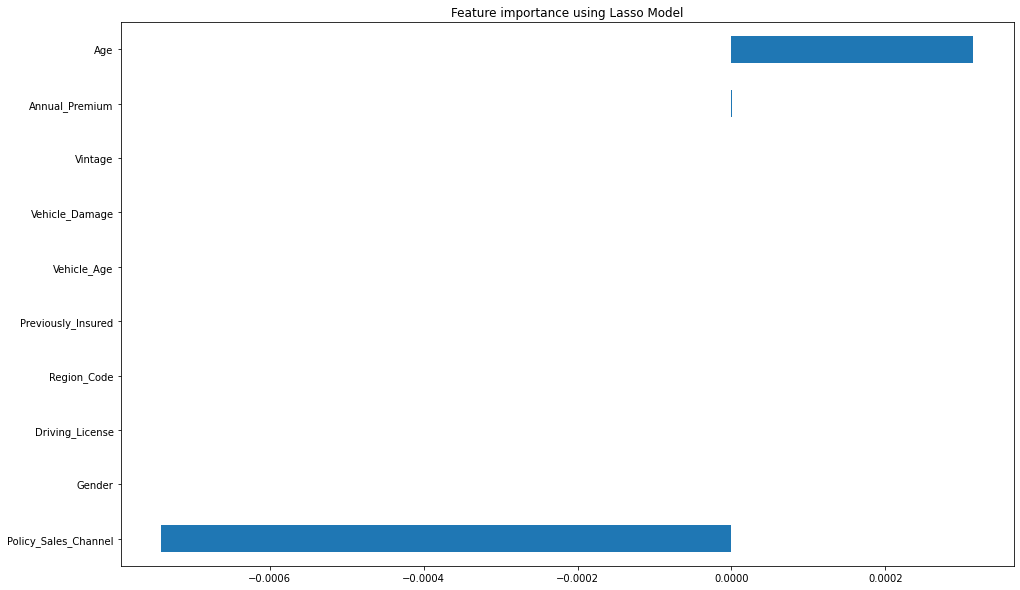

In [ ]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (16.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# **Roc Curve**

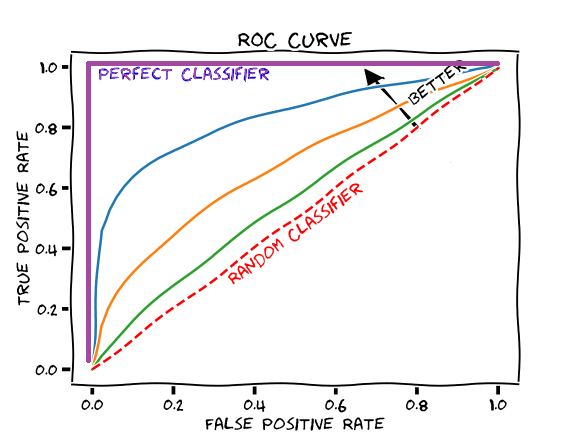

In [ ]:
def plot_ROC(fpr, tpr, m_name):
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic for %s'%m_name, fontsize=20)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()



# **Model Selection**

**StandardScaler** removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. **StandardScaler** can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [ ]:
x = df.iloc[:, [1,4,5,6,7,8]]

In [ ]:
y = df['Response']

In [ ]:
x_n = x.to_numpy()
y_n = y.to_numpy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)



# **logistic regression**

In [ ]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.300300
         Iterations 11
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.193      
Dependent Variable:  Response         AIC:              228906.2923
Date:                2020-11-27 16:17 BIC:              228971.3974
No. Observations:    381109           Log-Likelihood:   -1.1445e+05
Df Model:            5                LL-Null:          -1.4177e+05
Df Residuals:        381103           LLR p-value:      0.0000     
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      11.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Gender             -0.2014   0.0100 -20.1689 0.0000 -0.2210 -0.1818
Region_Code        -0.0221   0.0004 -62.

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [ ]:
print(cross_val_score(logreg, X_test, y_test, cv=5))
print(cross_val_score(logreg, X_test, y_test, cv=KFold(n_splits=5)))
print(cross_val_score(logreg, X_test, y_test, cv=StratifiedKFold(n_splits=5)))


[0.88114915 0.88126476 0.88126476 0.88113356 0.88113356]
[0.88141152 0.87903437 0.88362634 0.87811598 0.88375754]
[0.88114915 0.88126476 0.88126476 0.88113356 0.88113356]


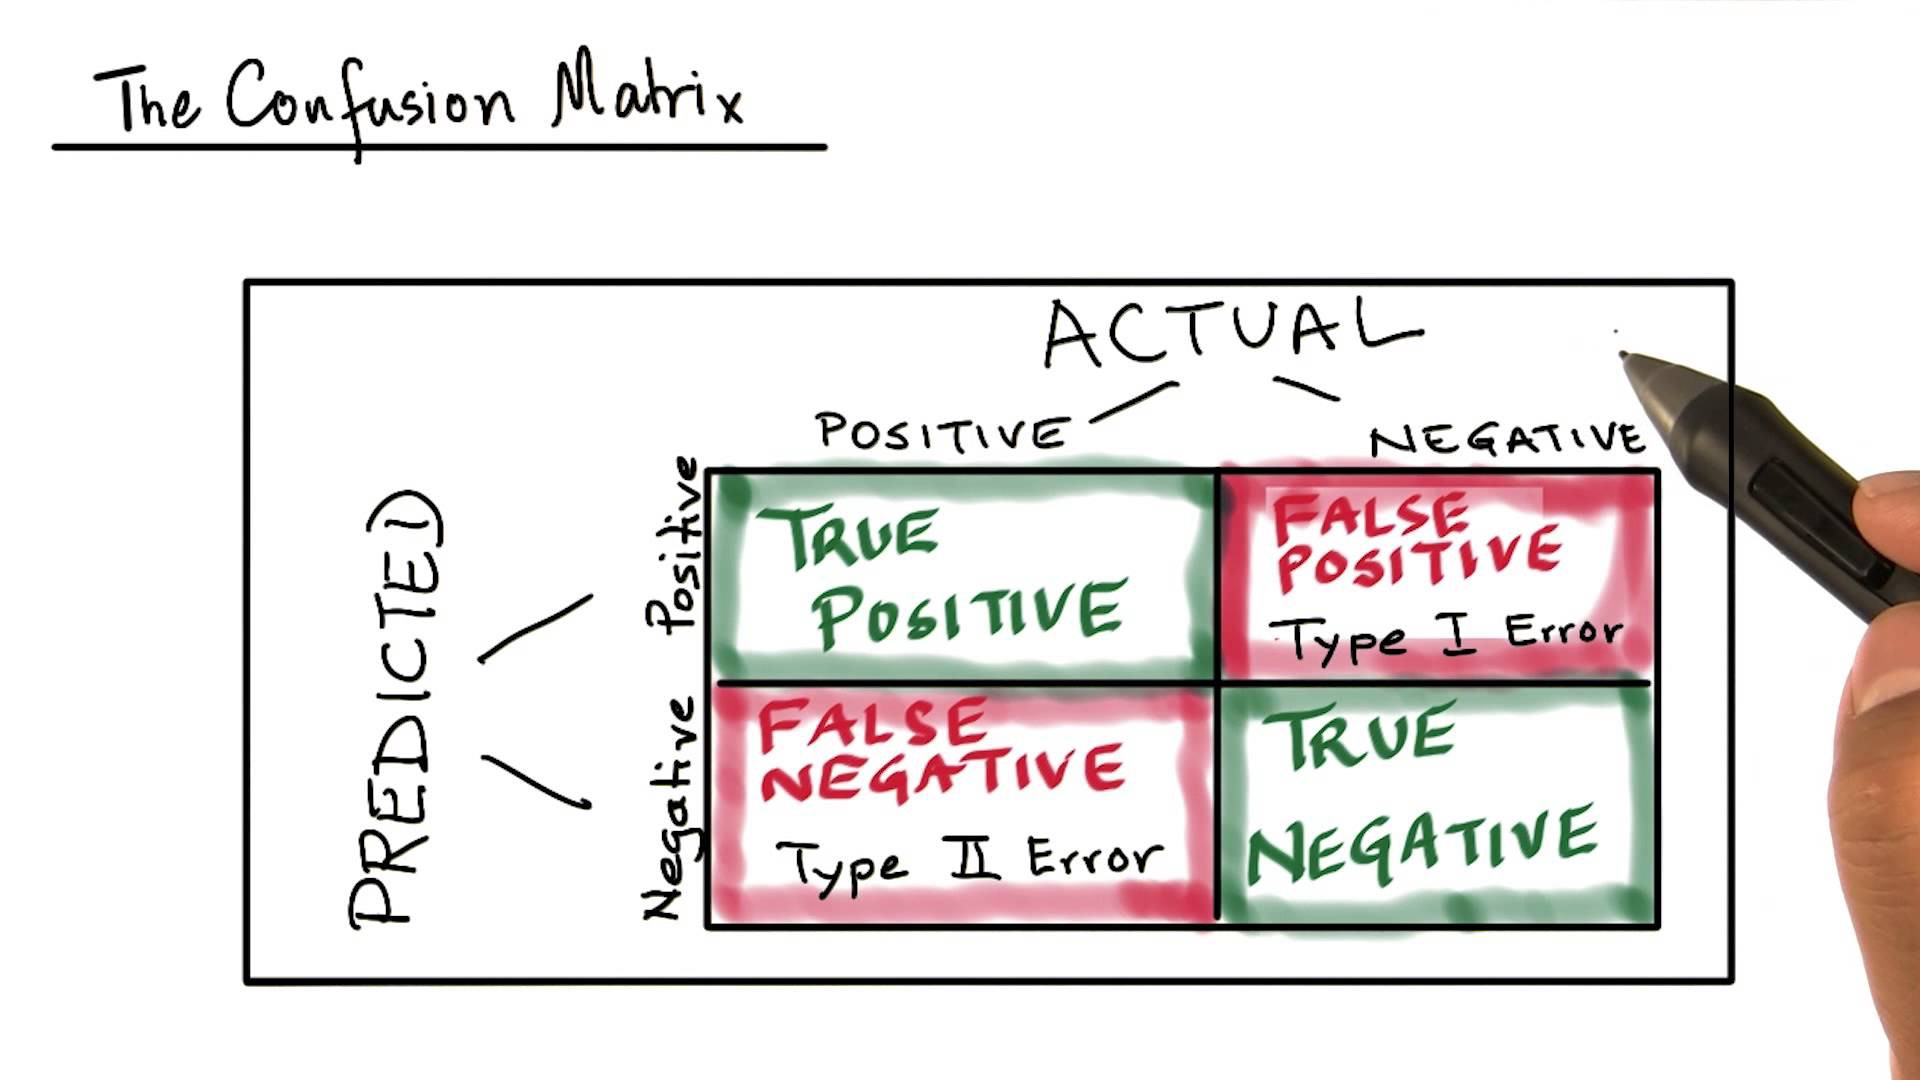

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[21804 11779]
 [ 2229  2299]]


In [ ]:
print(y_pred[0])

0


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.65      0.76     33583
           1       0.16      0.51      0.25      4528

    accuracy                           0.63     38111
   macro avg       0.54      0.58      0.50     38111
weighted avg       0.82      0.63      0.70     38111



In [ ]:
y_proba = logreg.predict_proba(X_test)[:,1]

1.The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

2.The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

3.The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

4.The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

  

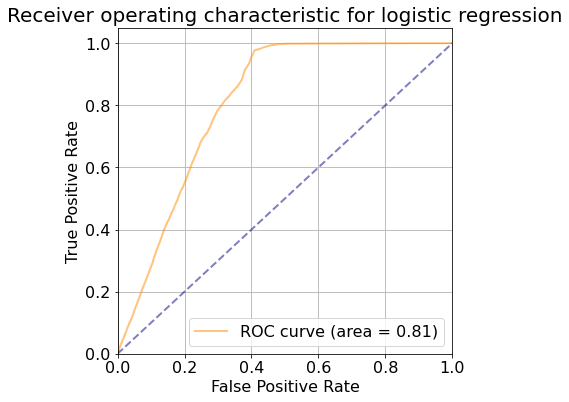

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plot_ROC(fpr, tpr,'logistic regression')


# **KNN**

**How** to choose the optimal number of neighbors? And what are its effects on the classifier?

 The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.
 In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.

Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. You can also try **Elbow method** here.

**pro**: There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm.
**con**: KNN also not suitable for large dimensional data. consumes large memory

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred2 = neigh.predict(X_test)


In [ ]:
print(cross_val_score(neigh, x_test, y_test, cv=5))
print(cross_val_score(neigh, x_test, y_test, cv=KFold(n_splits=5)))
print(cross_val_score(neigh, x_test, y_test, cv=StratifiedKFold(n_splits=5)))


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred2))

[[95363  4878]
 [12000  2092]]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.8523785783632022
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    100241
           1       0.30      0.15      0.20     14092

    accuracy                           0.85    114333
   macro avg       0.59      0.55      0.56    114333
weighted avg       0.82      0.85      0.83    114333



In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

y_pred21 = neigh.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred21))

[[96528  3713]
 [12514  1578]]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.8523785783632022
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    100241
           1       0.30      0.15      0.20     14092

    accuracy                           0.85    114333
   macro avg       0.59      0.55      0.56    114333
weighted avg       0.82      0.85      0.83    114333



In [ ]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)

y_pred22 = neigh.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred22))

[[98221  2020]
 [13201   891]]


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred22))
print(classification_report(y_test, y_pred22))

Accuracy: 0.8668713319863907
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100241
           1       0.31      0.06      0.10     14092

    accuracy                           0.87    114333
   macro avg       0.59      0.52      0.52    114333
weighted avg       0.81      0.87      0.83    114333



In [ ]:
error = []

for i in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred21 = knn.predict(X_test)
    error.append(np.mean(y_pred21 != y_test))

Text(0, 0.5, 'Mean Error')

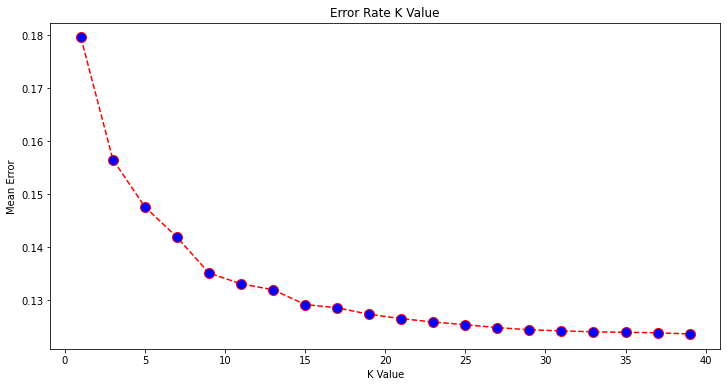

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40, 2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


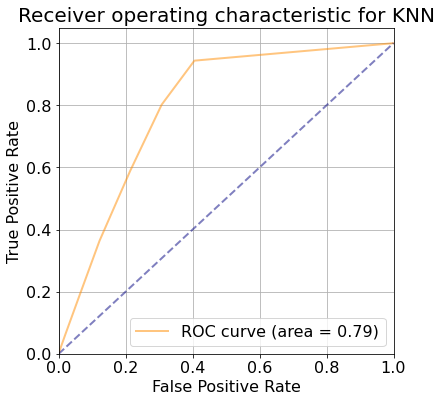

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test)[:,1])

plot_ROC(fpr, tpr,'KNN')


***from the above graph K = 5 can be optimal which doesn't give overfitting.***

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.88


# **naive Bayes**


the calculation of **Bayes Theorem** can be simplified by making some assumptions, such as each input variable is independent of all other input variables. Although a **dramatic and unrealistic assumption**, this has the effect of making the calculations of the conditional probability **tractable** and results in an effective classification model referred to as **Naive Bayes**.
```
P(H|E) = (P(E|H) * P(H)) / P(E)
```



In [ ]:
df.head()

id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1       1   44  ...                  26.0      217         1
1   2       1   76  ...                  26.0      183         0
2   3       1   47  ...                  26.0       27         1
3   4       1   21  ...                 152.0      203         0
4   5       0   29  ...                 152.0       39         0

[5 rows x 12 columns]

In [ ]:
from sklearn.naive_bayes import GaussianNB


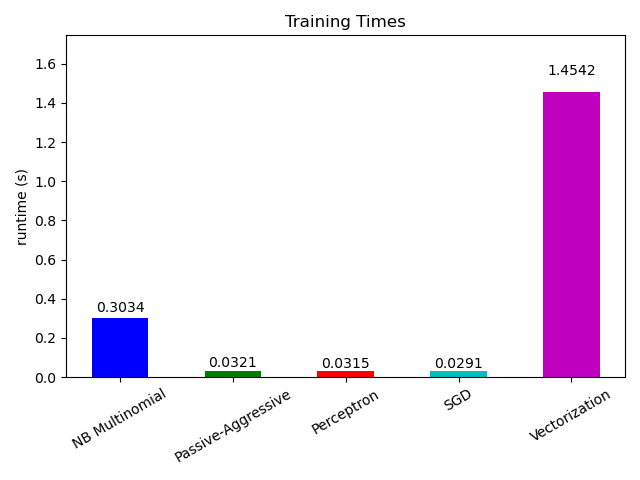

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred3 = gnb.predict(X_test)

In [ ]:
print(cross_val_score(gnd, x_test, y_test, cv=5))
print(cross_val_score(gnb, x_test, y_test, cv=KFold(n_splits=5)))
print(cross_val_score(gnb, x_test, y_test, cv=StratifiedKFold(n_splits=5)))

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))


Accuracy: 0.6375762028460724


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_reg = MultinomialNB().fit(x_train, y_train)
y_pred32 = nb_reg.predict(x_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred32))


Accuracy: 0.8740783500826533


In [ ]:
# skplt.metrics.plot_precision_recall_curve(y_test, y_pred)

IndexError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred32))

[[99774   467]
 [13930   162]]


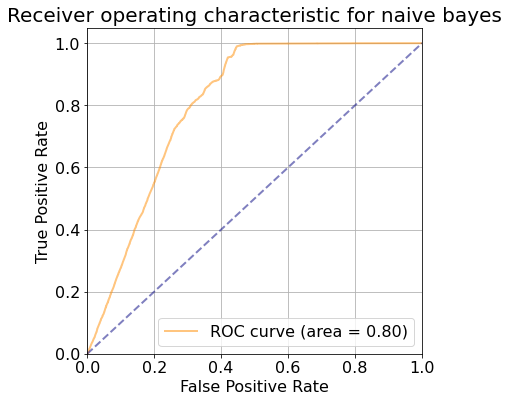

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, nb_reg.predict_proba(X_test)[:,1])
plot_ROC(fpr, tpr,'naive bayes')


# **decision tree classifier**

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [ ]:
dtc = DecisionTreeClassifier(max_depth=100, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3).fit(X_train,y_train)

In [ ]:
y_pred4 = dtc.predict(X_test)


In [ ]:
print(cross_val_score(dtc, x_test, y_test, cv=5))
print(cross_val_score(dtc, x_test, y_test, cv=KFold(n_splits=5)))
print(cross_val_score(dtc, x_test, y_test, cv=StratifiedKFold(n_splits=5)))


[0.87680803 0.87680803 0.87680803 0.87680803 0.87680399]
[0.87602086 0.87946472 0.87697202 0.87595526 0.8756232 ]
[0.87680803 0.87680803 0.87680803 0.87680803 0.87680399]


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

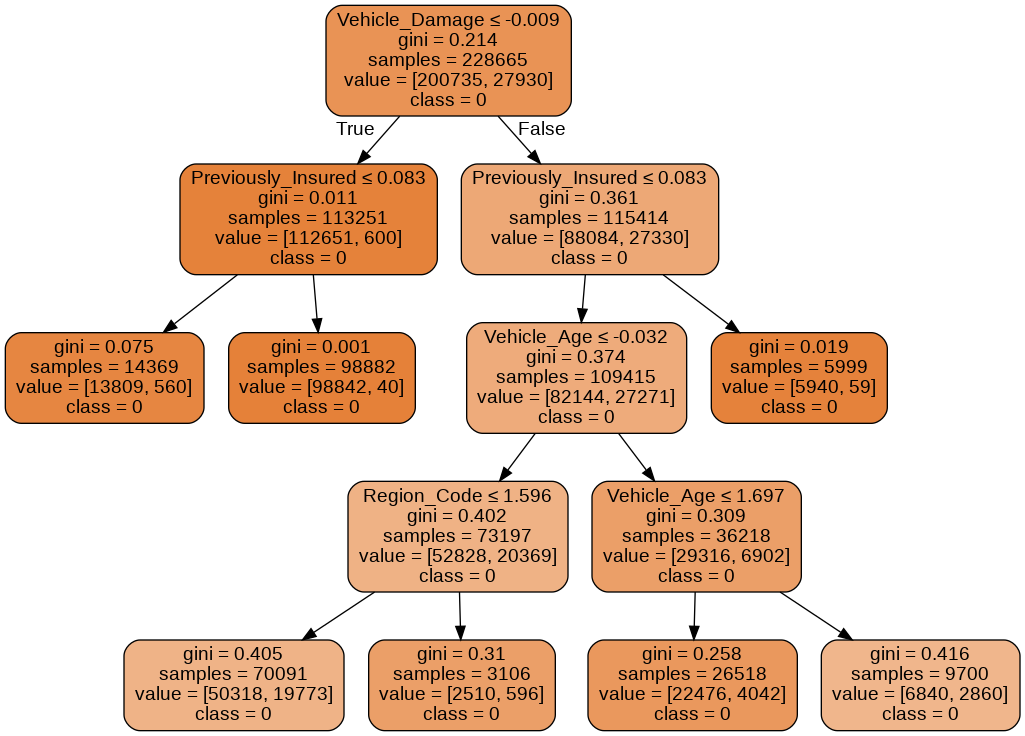

<Figure size 1296x576 with 0 Axes>

In [ ]:
plt.figure(figsize = (18, 8))
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('insurace_pred.png')
Image(graph.create_png())



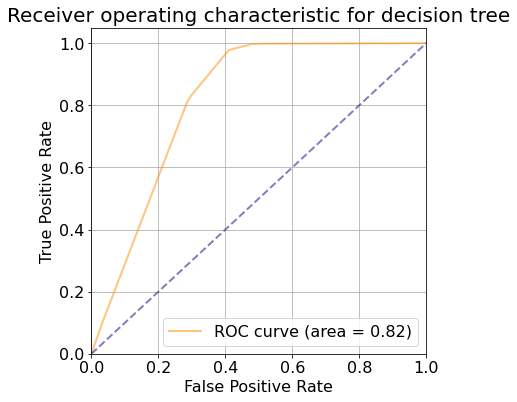

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plot_ROC(fpr, tpr,'decision tree')


In [ ]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,50,100],
             'min_samples_split': [2, 5, 10, 20]}
grid_tree = GridSearchCV(dtc, param_grid, cv=StratifiedKFold(n_splits=5), scoring= 'accuracy')
grid_tree.fit(X_train, y_train)
np.abs(grid_tree.best_score_)
print(grid_tree.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
xTree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Tree.fit(X_train, y_train)
predictions = Tree.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)


0.8767088242239773

# **support vector machine**

In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
import time

x_train, x_test, y_train, y_test = train_test_split(x_n, y_n, test_size=0.4, random_state=0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)



In [ ]:
clf = SVC(cache_size=7000)

In [ ]:
tic = time.time()
clf.fit(x_train, y_train)
toc = time.time()
print(toc-tic)


1260.9129929542542


In [ ]:
print(cross_val_score(clf, x_test, y_test, cv=5))
print(cross_val_score(clf, x_test, y_test, cv=KFold(n_splits=5)))
print(cross_val_score(clf, x_test, y_test, cv=StratifiedKFold(n_splits=5)))


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred4 = clf.predict(x_test)


In [ ]:
print(accuracy_score(y_test,y_pred4))

0.8768072210123061


In [ ]:
param_grid = {'C':[1], 'gamma':[0.3, 0.5], 'kernel':['rbf']}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(cache_size=7000), param_grid, refit=True, verbose=3)

grid.fit(X_test, y_test)

print('\n')
print('The best parameters are ', grid.best_params_)


In [ ]:
y_pred42 = grid.predict(x_test)
print(accuracy_score(y_test,y_pred42))


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test)[:,1])
plot_ROC(fpr, tpr,'svm')


IndexError: ignored

# **RandomForestClassifier**










In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


In [ ]:
random_search = {'criterion':['entropy','gini'],
                'max_depth':[2,3,4,5,6,7,10],
                'min_samples_leaf':[4,6,8],
                'min_samples_split':[5,7,10],
                'n_estimators':[300]}

rfc = RandomForestClassifier()
model = RandomizedSearchCV(estimator = rfc, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train, y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 16.0min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print(cross_val_score(model, x_test, y_test, cv=5))
print(cross_val_score(model, x_test, y_test, cv=KFold(n_splits=5)))
print(cross_val_score(model, x_test, y_test, cv=StratifiedKFold(n_splits=5)))


In [ ]:
y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report 

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[100241      0]
 [ 14092      0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.00      0.00      0.00     14092

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



In [ ]:
from sklearn.metrics import roc_auc_score, f1_score,roc_curve
y_score = model.predict_proba(x_test)[:,1]
fpr,tpr,_ = roc_curve(y_test,y_score)


In [ ]:
from sklearn.metrics import auc


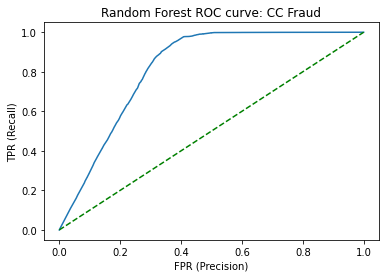

Area under curve (AUC):  0.8181747932699338


In [ ]:

plt.title('Random Forest ROC curve: CC Fraud')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed', color='green')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:

hyperparameters = {
                        "n_estimators": [4, 6, 9],
                        "criterion": ["entropy", "gini"],
                        "max_depth": [2, 5, 10],
                        "max_features": ["log2", "sqrt"],
                        "min_samples_leaf": [1, 5, 8],
                        "min_samples_split": [2, 3, 5]
                        }

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid=hyperparameters, cv=3)
grid.fit(X_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Best Score: {}".format(grid.best_score_))
print("Best Parameters: {}\n".format(grid.best_params_))

Best Score: 0.8778606258398888
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 6}



In [ ]:
test_pred = grid.predict(X_test)


In [ ]:
print (classification_report(test_y, test_pred))


# **gradient boosted decision tree**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[100240      1]
 [ 14092      0]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.00      0.00      0.00     14092

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



In [ ]:
print(cross_val_score(gb_clf2, x_test, y_test, cv=5))
print(cross_val_score(gb_clf2, x_test, y_test, cv=KFold(n_splits=5)))
print(cross_val_score(gb_clf2, x_test, y_test, cv=StratifiedKFold(n_splits=5)))

In [ ]:
import xgboost as xgb  # Extreme gradient Boosting
from xgboost import XGBClassifier


In [ ]:
import sklearn

In [ ]:
XGB_model_u = XGBClassifier(random_state = 2, max_depth = 8, 
                            n_estimators = 3000, reg_lambda = 1.2, reg_alpha = 1.2, 
                            min_child_weight = 1, 
                            objective = 'binary:logistic',
                            learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5, eval_metric = 'auc')

XGB_model_u.fit(X_train, y_train)
XGB_preds_u = XGB_model_u.predict_proba(X_test)
XGB_score_u = roc_auc_score(y_test, XGB_preds_u[:,1])
XGB_class_u = XGB_model_u.predict(X_test)

In [ ]:
print(cross_val_score(XGB_model_u, x_test, y_test, cv=5))
print(cross_val_score(XGB_model_u, x_test, y_test, cv=KFold(n_splits=5)))
print(cross_val_score(XGB_model_u, x_test, y_test, cv=StratifiedKFold(n_splits=5)))

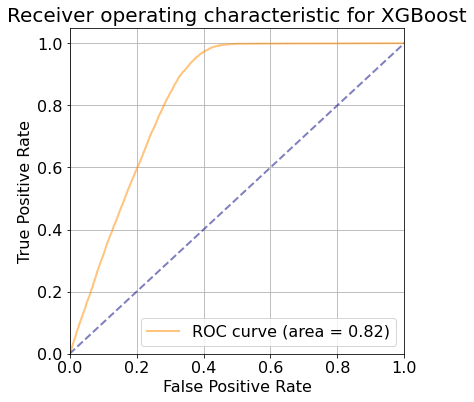

In [ ]:

(fpr, tpr, thresholds) = roc_curve(y_test, XGB_preds_u[:,1])

plot_ROC(fpr, tpr,'XGBoost')


# **Test Phase**

In [ ]:
rf=model
lr=logreg
knn = neigh
sv = clf
dtc = dtc
gb = gb_clf2
gnb = gnb

In [ ]:
models=[rf, lr, knn, sv, dtc, gb, gnb]
cv = StratifiedKFold(5, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate


In [ ]:
model_results = pd.DataFrame()
row_number = 0
results = []
names = []

for ml in models:
    model_name=ml.__class__.__name__
    print('Training %s model ' % model_name)
    cv_results = cross_validate(ml, X_train, y_train, cv=cv, scoring='roc_auc', return_train_score=True, n_jobs=-1 )
    model_results.loc[row_number,'Model Name']=model_name
    model_results.loc[row_number, 'Train roc_auc  Mean']=cv_results['train_score'].mean()
    model_results.loc[row_number, 'Test roc_auc  Mean']=cv_results['test_score'].mean()
    model_results.loc[row_number, 'Fit Time Mean']=cv_results['fit_time'].mean()
    results.append(cv_results)
    names.append(model_name)
    
    row_number+=1

Training RandomForestClassifier model 
Training LogisticRegression model 
Training LogisticRegression model 
Training GradientBoostingClassifier model 
Training GaussianNB model 


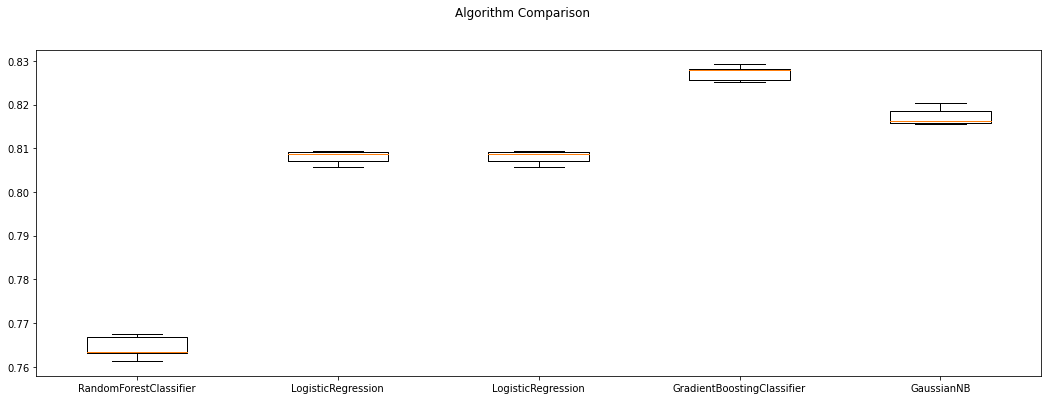

In [ ]:
cv_results_array = []
for tt in results:
    cv_results_array.append(tt['test_score'])

fig = plt.figure(figsize=(18, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_results_array)
ax.set_xticklabels(names)
plt.show()

In [ ]:
display(model_results.style.background_gradient(cmap='summer_r'))


# **SMOTE**

we can use smote oversampling to sample the minority class. It may cause overfitting wherein you have large class imbalance (as in this case). Smote works by finding k-nearest-neighbors for minority class observations (finding similar observations) and then creating a new observation by randomly choosing one of the k-nearest-neighbors. In this problem, similarity between features for both classes is high. Whether a case belongs to one or the other class can be hard to say out.



In [ ]:
!pip install scikit-plot

In [ ]:
import math
import random
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from imblearn.over_sampling import SMOTE
import scikitplot as skplt

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split(os_data_X,os_data_y, test_size=0.3, random_state=0)

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  468316
Number of no subscription in oversampled data 234158
Number of subscription 234158
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


i didn't use the feature scaling to the smote. i splited the data into three parts like **train/dev/test**.  i used oversampling to all the real data except for text data.

In [ ]:
targets = df['Response'].value_counts()
print(targets)
print('Percentage of Positive class - %.0f'%(targets[1]/(targets.sum())*100), '%')


0    334399
1     46710
Name: Response, dtype: int64
Percentage of Positive class - 12 %


In [ ]:
col_list = df.columns.to_list()[1:]
df_train_corr = df.copy()

categorical_features = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']
text_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

# encode text categorical features
le = LabelEncoder()
for f in text_features :
    df_train_corr[f] = le.fit_transform(df_train_corr[f])
for f in categorical_features :
    df_train_corr[f] = df_train_corr[f].astype('int32')

df_train_corr.head()


id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1       1   44  ...                    26      217         1
1   2       1   76  ...                    26      183         0
2   3       1   47  ...                    26       27         1
3   4       1   21  ...                   152      203         0
4   5       0   29  ...                   152       39         0

[5 rows x 12 columns]

In [ ]:
df_temp, X_test, y_temp, y_test = train_test_split(df_train_corr, df_train_corr['Response'], train_size=0.7, random_state = 2)
X_test = X_test.drop(columns = ['Response'])

In [ ]:
ovrsmpl = SMOTE(n_jobs=-1, k_neighbors=5, random_state = 2)
X_balanced, y_balanced = ovrsmpl.fit_resample(df_temp.drop(['Response'], axis=1), df_temp['Response'])
# sanity check
print(X_balanced.shape)
# X_balanced.head()


(467752, 11)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_balanced, y_balanced, train_size=0.9, random_state = 2)


In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
def plot_ROC(fpr, tpr, m_name):
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic for %s'%m_name, fontsize=20)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()

In [ ]:
def predict_display(df,target):
    rfc_preds_proba = rfc.predict_proba(df)
    rfc_pred = rfc.predict(df)
    rfc_preds_proba = rfc.predict_proba(df)
    rfc_score = roc_auc_score(target, rfc_preds_proba[:,1])
    (fpr, tpr, thresholds) = roc_curve(target, rfc_preds_proba[:,1])
    plot_ROC(fpr, tpr,'RandomForestClassifier')
    print('ROC AUC score for RandomForestClassifier model with over-sampling: %.4f'%rfc_score)
    print('F1 score: %0.4f'%f1_score(target, rfc_pred))
    print(f"Accuracy score is {100*accuracy_score(target,rfc_pred).round(2)}")
    skplt.metrics.plot_confusion_matrix(target, rfc_pred,figsize=(8,8))

In [ ]:
import sklearn

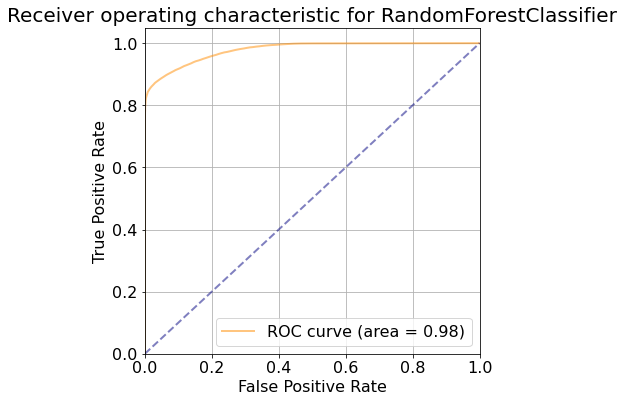

ROC AUC score for RandomForestClassifier model with over-sampling: 0.9780
F1 score: 0.9159
Accuracy score is 92.0


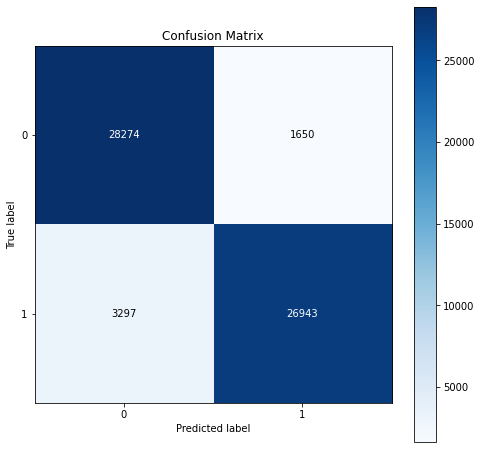

In [ ]:
predict_display(X_valid, y_valid)


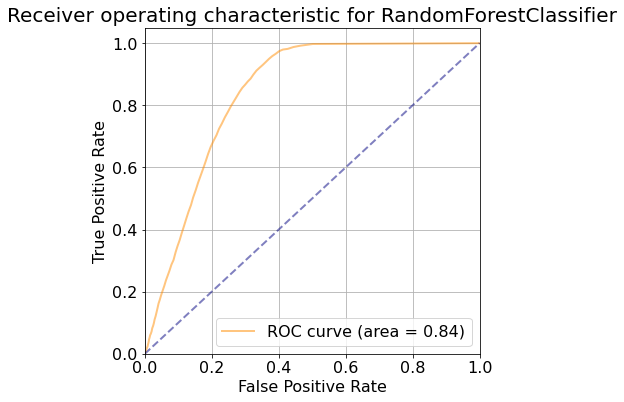

ROC AUC score for RandomForestClassifier model with over-sampling: 0.8386
F1 score: 0.2544
Accuracy score is 86.0


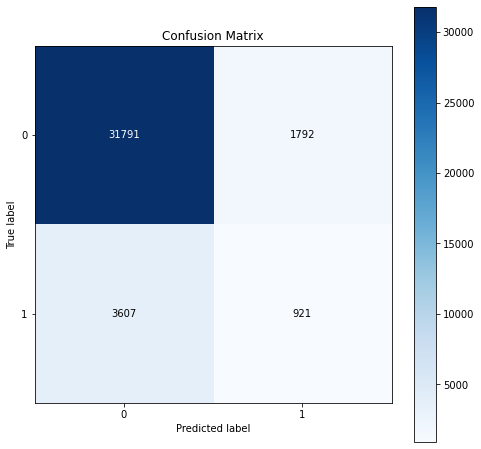

In [ ]:
predict_display(X_test, y_test)


In [ ]:
print('before oversampling',y_temp.value_counts())  # before over sampling.

before oversampling 0    300816
1     42182
Name: Response, dtype: int64


In [ ]:
# print('after oversampling',y_balanced.value_counts()) # before over sampling.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
counter = Counter(y_train)

In [ ]:
print("before ", counter)

In [ ]:
ada = SMOTE(random_state=130)

In [ ]:
X_overs, y_overs =  ada.fit_sample(X_train, y_train)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_overs, y_overs, train_size=0.7, random_state = 2)


In [ ]:
logreg_os = LogisticRegression()
logreg_os.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg_os.predict(X_valid)

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_valid, logreg_os.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64     57047
           1       0.63      0.50      0.56     57055

    accuracy                           0.60    114102
   macro avg       0.61      0.60      0.60    114102
weighted avg       0.61      0.60      0.60    114102



smotenc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify =y, train_size=0.7, random_state = 2)


In [ ]:
x.head(1)

Gender  Region_Code  ...  Vehicle_Damage  Annual_Premium
0       1         28.0  ...               1         40454.0

[1 rows x 6 columns]

In [ ]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
ada1 = SMOTENC([0], random_state=10)

In [ ]:
X_train.shape

(266776, 6)